# Assignment8

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [86]:
df = pd.read_csv("car_data.csv")

In [87]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [88]:
df.shape

(804, 12)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [90]:
#sb.pairplot(df,hue = 'Make')
#plt.show()

In [91]:
print(df.corr())

             Price   Mileage  Cylinder     Liter     Doors    Cruise  \
Price     1.000000 -0.143051  0.569086  0.558146 -0.138750  0.430851   
Mileage  -0.143051  1.000000 -0.029461 -0.018641 -0.016944  0.025037   
Cylinder  0.569086 -0.029461  1.000000  0.957897  0.002206  0.354285   
Liter     0.558146 -0.018641  0.957897  1.000000 -0.079259  0.377509   
Doors    -0.138750 -0.016944  0.002206 -0.079259  1.000000 -0.047674   
Cruise    0.430851  0.025037  0.354285  0.377509 -0.047674  1.000000   
Sound    -0.124348 -0.026146 -0.089704 -0.065527 -0.062530 -0.091730   
Leather   0.157197  0.001005  0.075520  0.087332 -0.061969 -0.070573   

             Sound   Leather  
Price    -0.124348  0.157197  
Mileage  -0.026146  0.001005  
Cylinder -0.089704  0.075520  
Liter    -0.065527  0.087332  
Doors    -0.062530 -0.061969  
Cruise   -0.091730 -0.070573  
Sound     1.000000  0.165444  
Leather   0.165444  1.000000  


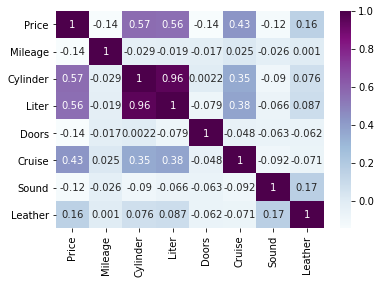

In [92]:
plot = sb.heatmap(df.corr(),cmap='BuPu',annot = True)
plt.show()

In [93]:
x = df['Mileage'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

In [94]:
from sklearn.linear_model import LinearRegression

li_reg = LinearRegression()

li_reg = li_reg.fit(x,y)

intercept = li_reg.intercept_
coefficient = li_reg.coef_

In [95]:
print('intercept:', li_reg.intercept_)
print('coefficient:', li_reg.coef_)

intercept: [24764.55900606]
coefficient: [[-0.1725205]]


In [96]:
f"The regression eqauation for Mileage and price of the car  is y = {coefficient}x + {intercept} "

'The regression eqauation for Mileage and price of the car  is y = [[-0.1725205]]x + [24764.55900606] '

In [97]:
print('r-squared: ', li_reg.score(x, y))

r-squared:  0.02046344732348926


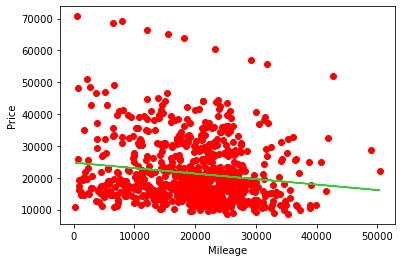

In [98]:
plt.scatter(x, y, c='red')
plt.plot(x, li_reg.predict(x), c='limegreen')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [99]:
df['Mileage'].corr(df['Price'])

-0.1430505061979486

it's observed that mileage and price are negatively correlated which is not a good feature selection and to make predictions

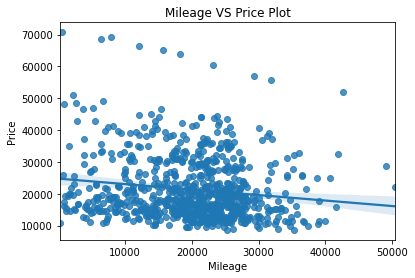

In [100]:
import seaborn as sb
data = df
plt.figure()
sb.regplot(x = 'Mileage',y = 'Price', data = df).set(title = f'Mileage VS Price Plot')
plt.show()

In [101]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [103]:
x = df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
y = df[['Price']]

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [105]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
  
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)


In [106]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
x_ = scaler.fit_transform(x)
x = pd.DataFrame(x_, columns=x.columns)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Feature selection [ True  True  True  True  True  True  True]
Feature scores [ 13.21738628 287.307244   259.91684088  12.41822671 117.57876621
   7.74239184  14.45038867]
Selected features: ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
Removed features: []


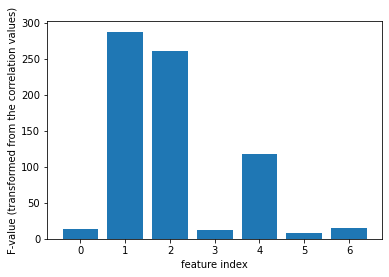

In [107]:
# feature selection

fes = SelectKBest(score_func=f_regression, k='all')
fes.fit(x_train,y_train)
x_train = fes.transform(x_train)
x_test = fes.transform(x_test)


print("Feature selection", fes.get_support())
print("Feature scores", fes.scores_)
print("Selected features:", list(x.columns[fes.get_support()]))
print("Removed features:", list(x.columns[~fes.get_support()]))

plt.bar([i for i in range(len(fes.scores_))], fes.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

In [108]:

li_reg = LinearRegression()

li_reg = li_reg.fit(x_train,y_train)

intercept = li_reg.intercept_
coefficient = li_reg.coef_

In [109]:
print('intercept:', li_reg.intercept_)
print('coefficient:', li_reg.coef_)

intercept: [5574.56032587]
coefficient: [[-2.00008478e-01  4.67337834e+03 -1.70489580e+03 -1.61978646e+03
   5.99125447e+03 -1.72318491e+03  3.55000531e+03]]


In [110]:
print('r-squared: ', li_reg.score(x, y))

r-squared:  -0.749480765440486


In [111]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [112]:
df['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [113]:
df_copy = df.copy()

In [114]:
df_copy.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [115]:
df_copy = pd.get_dummies(df_copy,columns=['Make','Model','Trim','Type'])

In [116]:
df_copy.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0


In [117]:
df = df_copy

In [118]:
df

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,6,3.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [133]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197,-0.017768,0.659297,...,-0.126745,-0.134573,0.038838,0.040549,-0.060414,0.508018,-0.168087,-0.206178,-0.034802,0.045134
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005,0.024193,-0.037472,...,-0.062219,0.035201,-0.022737,-0.015758,-0.073391,0.027436,0.001510,-0.025691,-0.015905,0.027016
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520,0.175317,0.534896,...,-0.102674,-0.102674,0.141306,0.059189,-0.102674,0.061533,-0.041657,-0.055019,0.180832,-0.269058
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332,0.188093,0.406216,...,-0.145992,-0.145992,0.120356,0.077468,-0.125677,0.065886,0.046832,-0.125252,0.140098,-0.255308
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969,0.184913,0.087104,...,0.062428,0.062428,0.288053,0.062428,0.062428,-0.462921,-0.825444,0.157973,0.694906,0.163594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Type_Convertible,0.508018,0.027436,0.061533,0.065886,-0.462921,0.147689,-0.043637,0.009285,-0.085600,0.086456,...,-0.028899,-0.028899,-0.133346,-0.028899,-0.028899,1.000000,-0.118244,-0.073129,-0.321686,-0.075731
Type_Coupe,-0.168087,0.001510,-0.041657,0.046832,-0.825444,-0.040646,0.097838,0.063507,-0.152636,-0.152636,...,-0.051531,-0.051531,-0.237772,-0.051531,-0.051531,-0.118244,1.000000,-0.130397,-0.573605,-0.135037
Type_Hatchback,-0.206178,-0.025691,-0.055019,-0.125252,0.157973,-0.264846,0.073544,0.090697,-0.094398,-0.094398,...,0.395185,-0.031870,-0.147051,-0.031870,-0.031870,-0.073129,-0.130397,1.000000,-0.354750,-0.083515
Type_Sedan,-0.034802,-0.015905,0.180832,0.140098,0.694906,0.125714,-0.015079,-0.100940,0.266099,0.180930,...,-0.140192,0.089837,0.414521,0.089837,-0.140192,-0.321686,-0.573605,-0.354750,1.000000,-0.367373


In [138]:
x = df.iloc[:,1:98]

In [139]:
x.shape

(804, 97)

In [140]:
y = df.iloc[:,0]

In [141]:
y.shape

(804,)

In [142]:
#x = np.array(x).reshape((-1,97))
#y = np.array(y).reshape((-1,1))

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [144]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
x_ = scaler.fit_transform(x)
x = pd.DataFrame(x_, columns=x.columns)

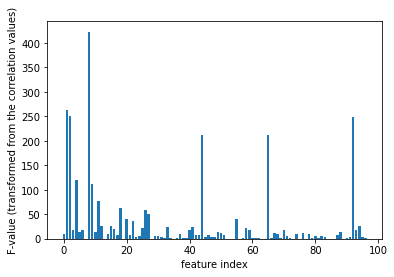

In [145]:

fes = SelectKBest(score_func=f_regression, k='all')
fes.fit(x_train,y_train)
x_train = fes.transform(x_train)
x_test = fes.transform(x_test)



#print("Feature selection", fes.get_support())
#print("Feature scores", fes.scores_)
#print("Selected features:", list(x.columns[fes.get_support()]))
#print("Removed features:", list(x.columns[~fes.get_support()]))

plt.bar([i for i in range(len(fes.scores_))], fes.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

In [146]:
x_train.shape


(603, 97)

In [147]:
#from sklearn.decomposition import PCA

#pca = PCA(n_components = 2)
#pca.fit(x_train,x_test)
#x_train = pca.transform(x_train)
#x_test = pca.transform(x_test)
  
#x_train.shape

In [148]:
li_reg = LinearRegression()

li_reg = li_reg.fit(x_train,y_train)

intercept = li_reg.intercept_
coefficient = li_reg.coef_

In [149]:
print('intercept:', li_reg.intercept_)
print('coefficient:', li_reg.coef_)

intercept: 16981.471797052352
coefficient: [-1.88640892e-01  4.57789458e+02  4.32272691e+03 -1.34037841e+03
  1.12899873e+02  8.79371614e+01  2.75818221e+02 -3.53812549e+03
  9.65738699e+03 -4.01263088e+03 -4.66998742e+03  5.50296647e+03
 -2.93960966e+03 -3.40354563e+03  1.42307933e+03  2.13481013e+03
  2.44466734e+03  2.90395529e+03  9.45749875e+01 -2.87914942e+03
  1.26548392e+03 -1.66305617e+02 -4.20728773e+02 -2.25972832e+03
  1.01786445e+03  3.73251366e+02  5.08693583e+03 -5.86994504e+03
  6.39641189e+02  1.46639888e+02 -8.81852346e+02 -3.15680307e+03
 -2.86966571e+03 -7.22504140e+02 -2.21710553e+03 -9.80429109e+02
 -2.23512483e+03 -3.25782487e+03 -4.03703816e+03  1.93715677e+03
  3.51259850e+03  3.85810980e+03  5.07027492e+02  9.54508838e+02
  7.05744542e+03  1.00255420e+03 -1.33667897e+03 -1.93636083e+02
 -8.64484367e+02  2.31232515e+03  2.75896448e+03  1.07128846e+03
 -1.36502705e+03 -8.91075507e+01  4.73705496e+02 -4.27536972e+03
 -1.88104163e+03 -2.47908402e+03  2.47584554e+0

In [150]:
print('r-squared: ', li_reg.score(x_test, y_test))

r-squared:  0.9917965390918821


In [132]:
#from sklearn.feature_selection import SelectFromModel

#fs_selector = SelectFromModel(estimator = LinearRegression())
#fs_selector.fit(x,y)